In [25]:
#import
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#missing value
df.isnull().sum()
#so we don't have null

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

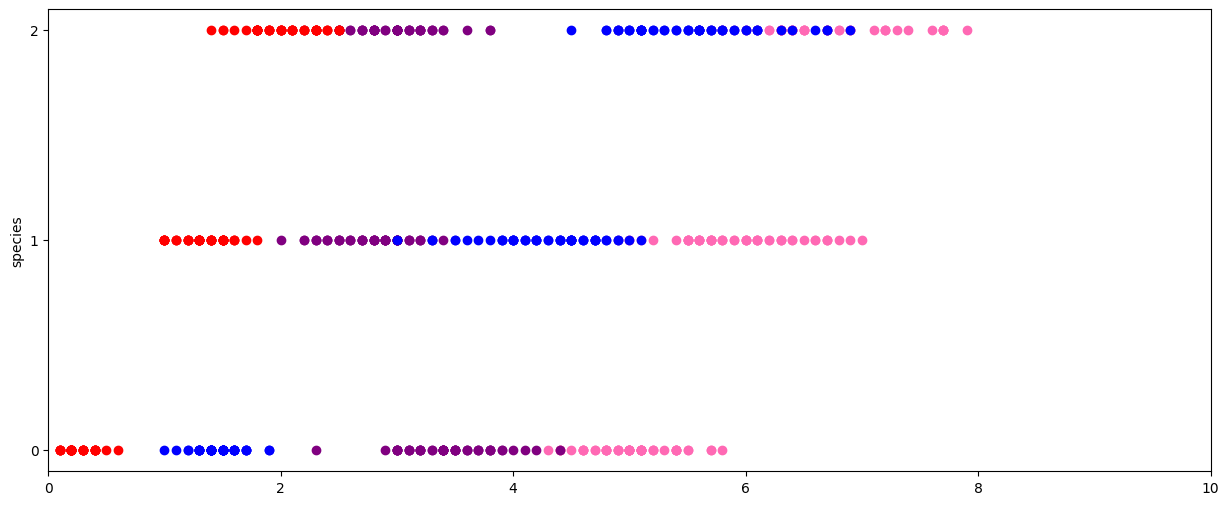

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(df['sepal length (cm)'],df['species'],color="hotpink")
plt.scatter(df['sepal width (cm)'],df['species'],color="purple")
plt.scatter(df['petal width (cm)'],df['species'],color="red")
plt.scatter(df['petal length (cm)'],df['species'],color="blue")
plt.ylabel("species")
plt.xlim(0,10)
plt.yticks([0,1,2])
plt.show()

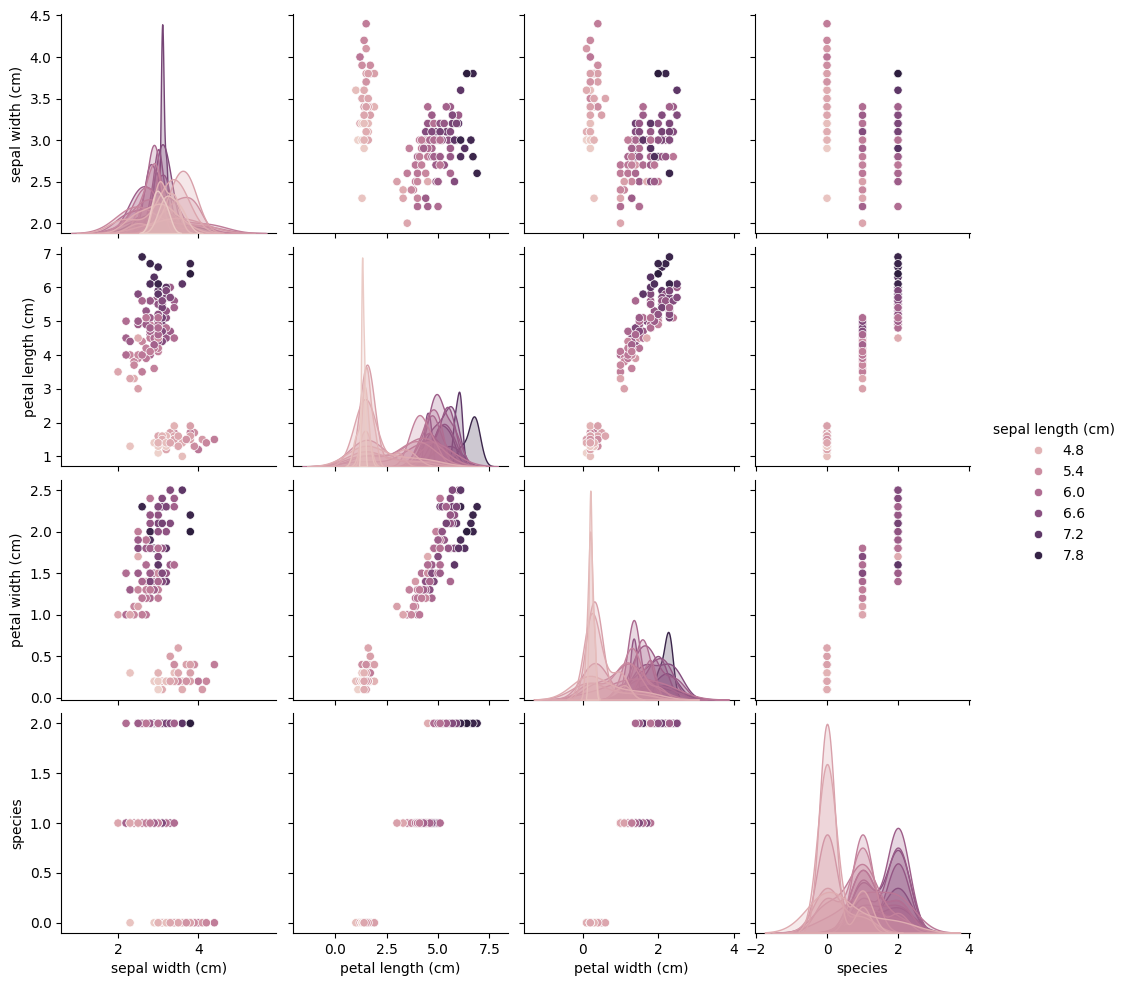

In [ ]:
sns.pairplot(df,hue="sepal length (cm)")
plt.show()

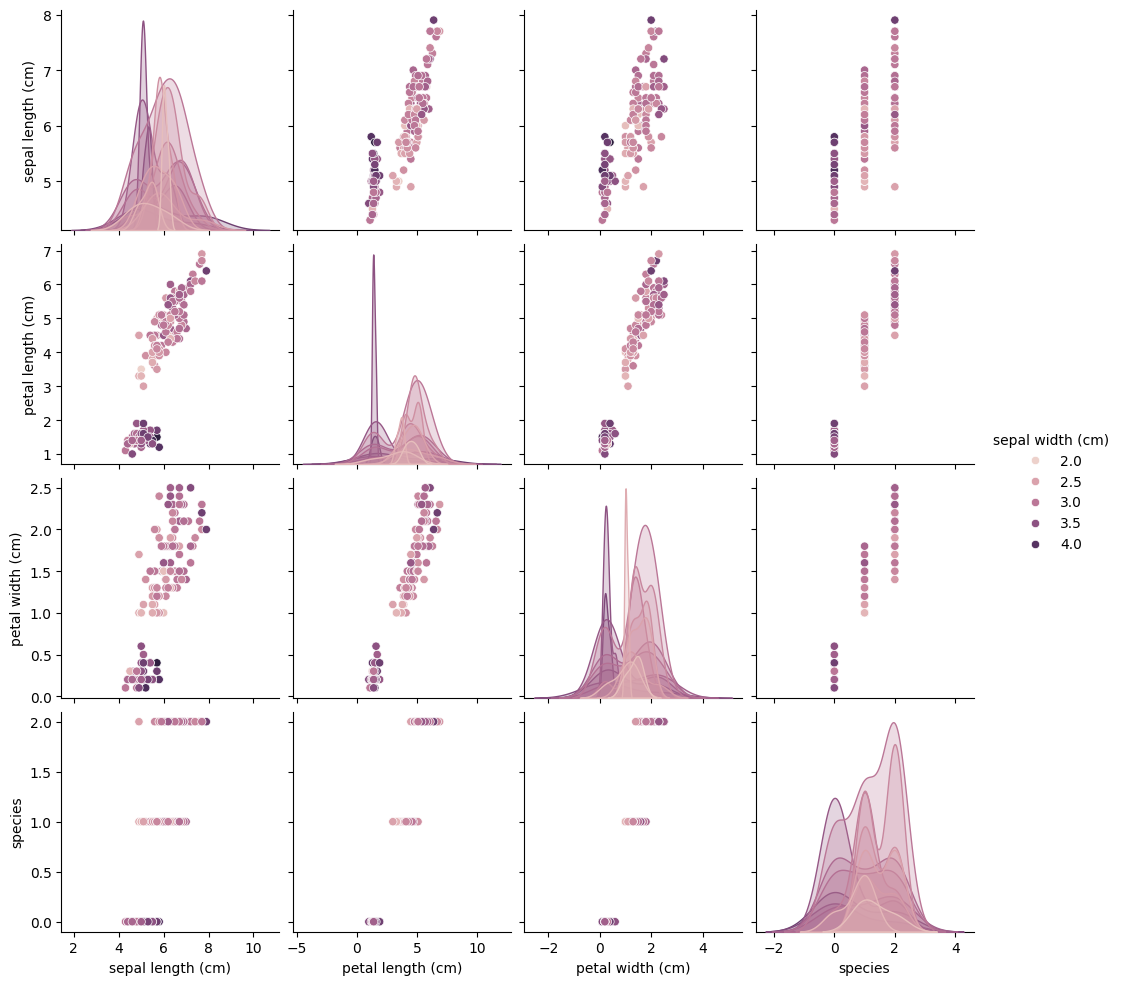

In [ ]:
sns.pairplot(df,hue="sepal width (cm)")
plt.show()

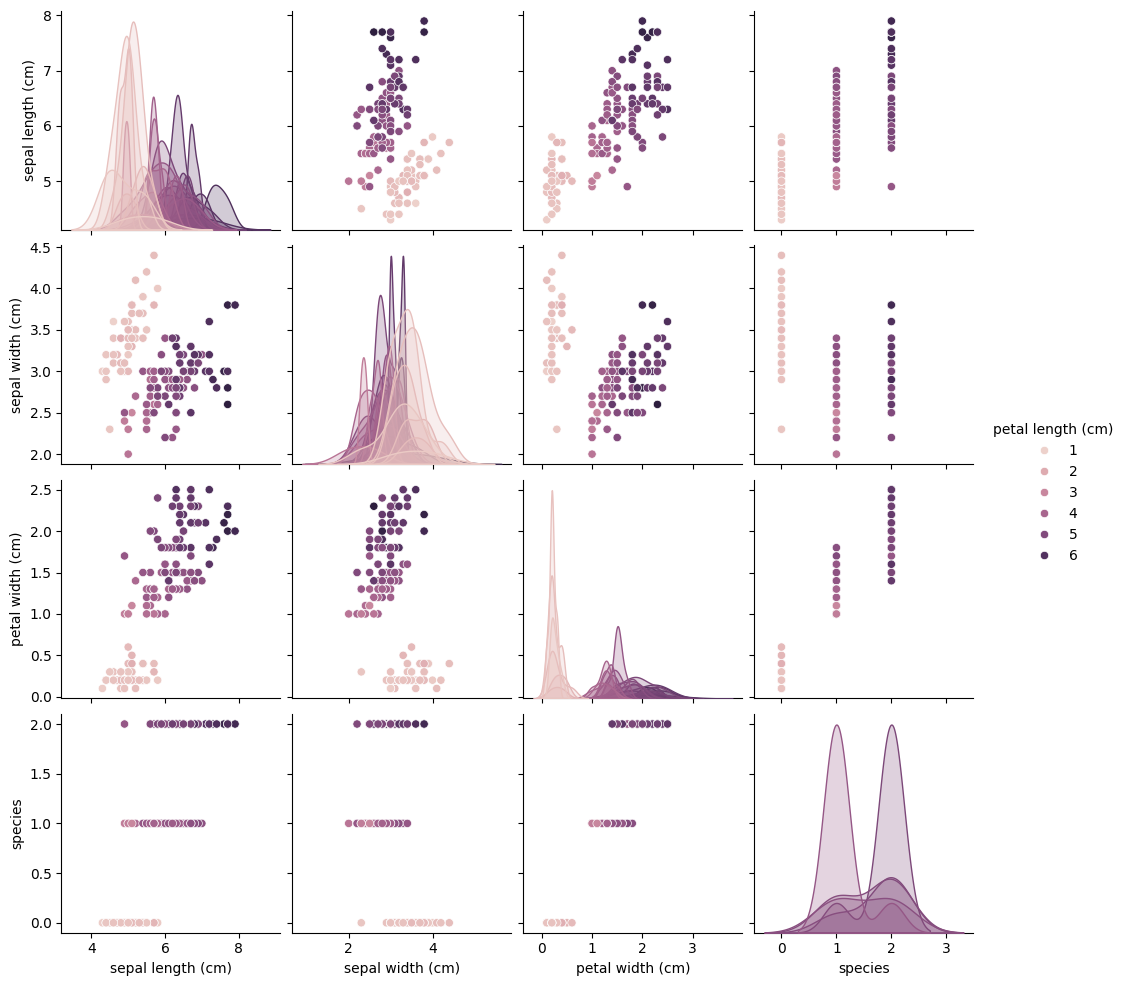

In [ ]:
sns.pairplot(df,hue="petal length (cm)")
plt.show()

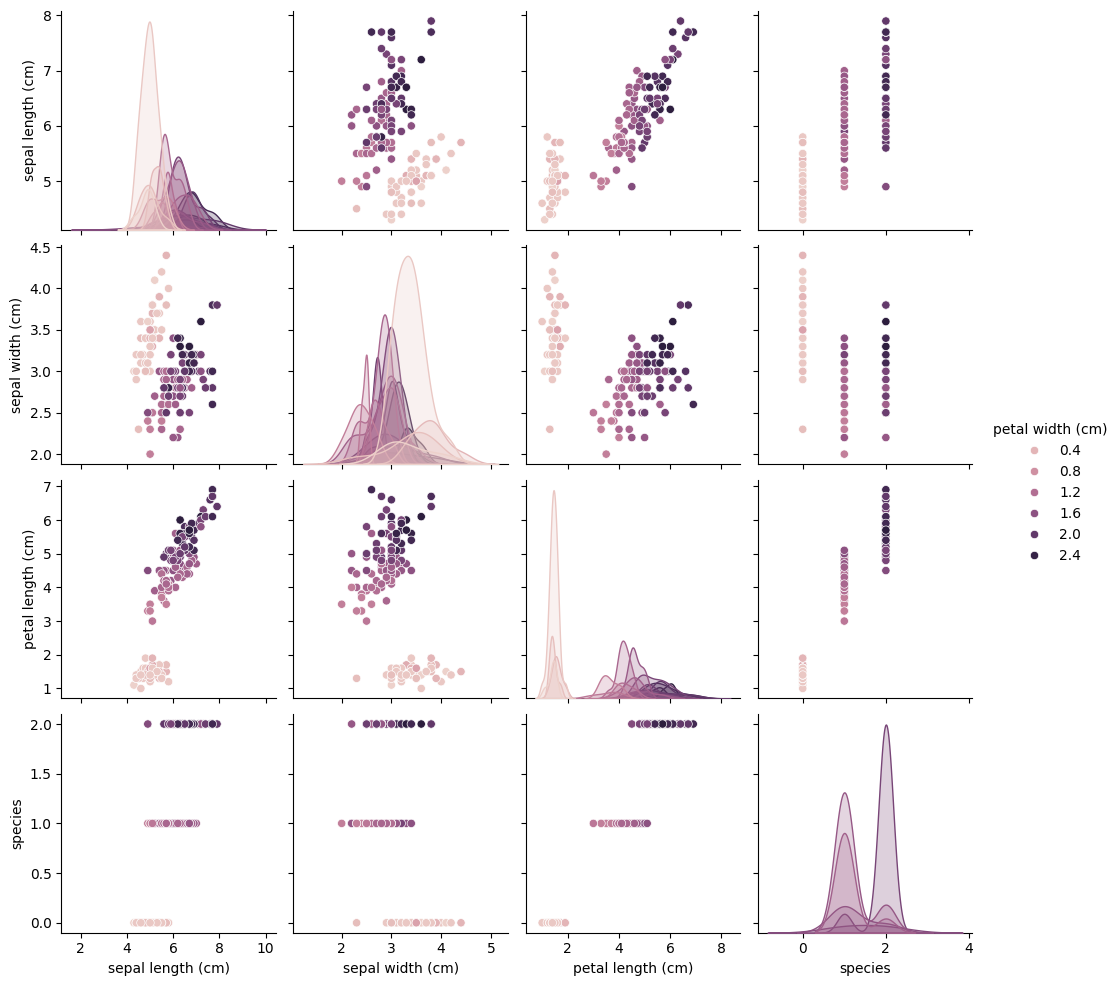

In [ ]:
sns.pairplot(df,hue="petal width (cm)")
plt.show()

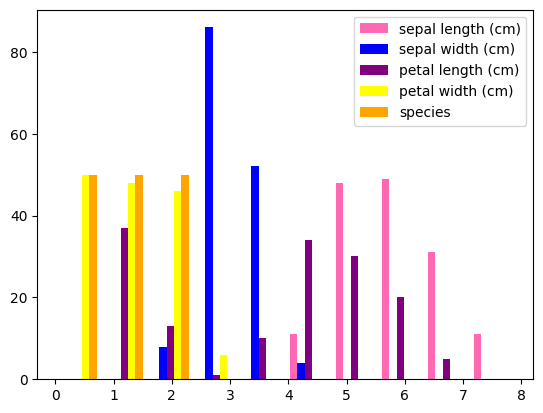

In [ ]:
plt.hist(df,
         color = ['hotpink','blue','purple','yellow','orange'],
         label = df.columns)
plt.legend()
plt.show()

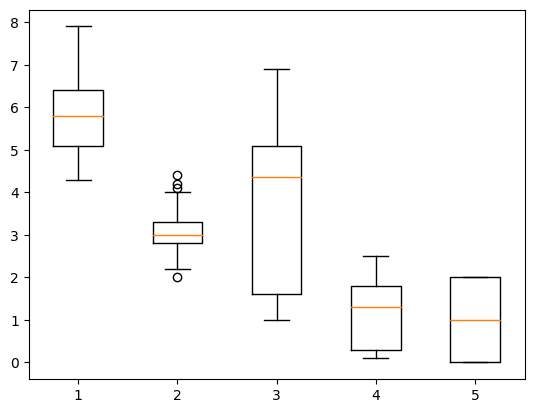

In [ ]:
plt.boxplot(df)
plt.show()

Because there is no missing data and the target has been mapped, these cells were not necessary. However, I completed them according to the project documentation requirements.

In [ ]:
for i in df.columns:
  df[i].fillna(0)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)#train:80% test:20%

In [17]:
lr=linear_model.LogisticRegression()
lr.fit(X_train,y_train)
predict=lr.predict(X_test)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 1])

[Text(0.5, 0.9, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'petal length (cm) <= 4.85\ngini = 0.05\ns

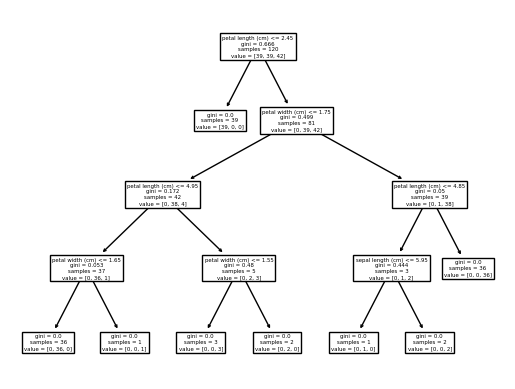

In [18]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)
tree.plot_tree(dt,feature_names=df.columns)

In [19]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rfp=rf.predict(X_test)
rfp

array([1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 1])

In [24]:
svm = SVC()
svm.fit(X_train, y_train)
svmp=svm.predict(X_test)
svmp

array([1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 1])

In [34]:
for i in range (1,11):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  knnp=knn.predict(X_test)
  print(i,knnp)

1 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
2 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
3 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
4 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
5 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
6 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
7 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
8 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
9 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
10 [1 1 1 0 0 0 2 0 2 0 1 0 2 2 1 0 2 1 2 0 0 2 1 2 0 1 0 1 1 1]
